In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
from  data_loader import load_tokyo_temp
y, m, temp = load_tokyo_temp()

In [3]:
temp = temp[(1990 <= y)*(y <=2019)]
m = m[(1990 <= y)*(y <=2019)]
y = y[(1990 <= y)*(y <=2019)]

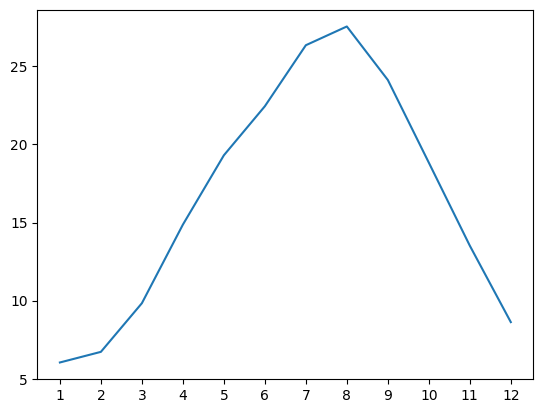

In [4]:
month = np.arange(1, 13, 1)
temp_clim = np.zeros((12))

for mm in range(1, 13):
    temp_clim[mm-1] = np.nanmean(temp[m==mm], 0)
plt.plot(month, temp_clim)
plt.xticks(month)
plt.show()

## 4.3 Calculate deviation of tokyo temperature

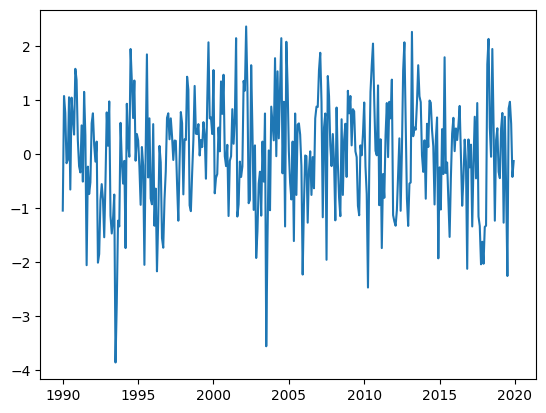

In [5]:
mon = np.arange(1990, 2020, 1/12)

tmt = temp.shape

tempa = np.zeros((tmt))

for yy in range(1990, 2020):
    for mm in range(1, 13):
        tempa[(y==yy)*(m==mm)] = temp[(y==yy)*(m==mm)] - temp_clim[mm-1]
plt.plot(mon, tempa)
plt.show()        

## 4.4 Draw SST Deviation

### 4.4.1 Data load

In [6]:
from  data_loader import load_sst
sst, lon2, lat2, y, m = load_sst()

loadfile2 = './data/sstc_OISST.npz'
sstc_dataset = np.load(loadfile2)
sst_clim = sstc_dataset['sst_clim']

### 4.4.2 Calculate SST deviations

In [7]:
[imt, jmt, tmt] = sst.shape

ssta = np.zeros((imt, jmt, tmt))

for yy in range(1982, 2020):
    for mm in range(1, 13):
        ssta[:, :, (y==yy)*(m==mm)] = \
            sst[:, :, (y==yy)*(m==mm)] - (sst_clim[:, :, mm-1])[:,:, np.newaxis]
savefile = './data/ssta_OISST.npz'
np.savez(savefile, ssta=ssta, lon2=lon2, lat2=lat2, y=y, m=m)

### 4.4.3 Draw any month SST Deviation

Text(0.5, 1.0, '1997/12')

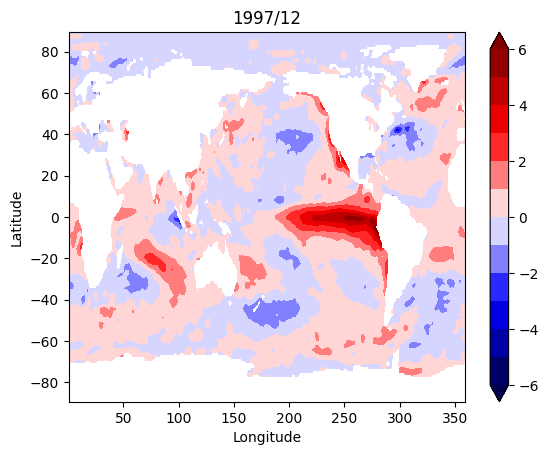

In [8]:
draw_year = 1997
draw_month = 12

vmin = -6
vmax = 6
vint = 1

plt.figure()
cm = plt.get_cmap('seismic')
cs = plt.contourf(lon2, lat2, \
                  np.squeeze(ssta[:, :, (y==draw_year)*(m==draw_month)]), \
                  cmap=cm, norm=Normalize(vmin=vmin, vmax=vmax), \
                  levels=np.arange(vmin, vmax+vint, vint), extend='both')
plt.colorbar(cs)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
title = str(draw_year) + '/' + str(draw_month)
plt.title(title)